In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding = 'latin1', sep= ';', decimal = ',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df[filtro_presenca]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,210054972570,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476095,210057138057,2022,12,M,2,1,1,1,7,1,...,B,A,A,B,A,B,C,A,A,B
3476097,210055398098,2022,11,F,1,2,1,1,11,1,...,A,A,A,B,A,A,B,A,B,B
3476098,210055668087,2022,2,M,0,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
3476099,210055303118,2022,11,F,1,1,1,1,11,1,...,A,A,B,B,B,A,C,A,A,A


C:\Users\gusri\AppData\Local\Temp\ipykernel_16972\1868197027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
C:\Users\gusri\AppData\Local\Temp\ipykernel_16972\1868197027.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
C:\Users\gusri\AppData\Local\Temp\ipykernel_16972\1868197027.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

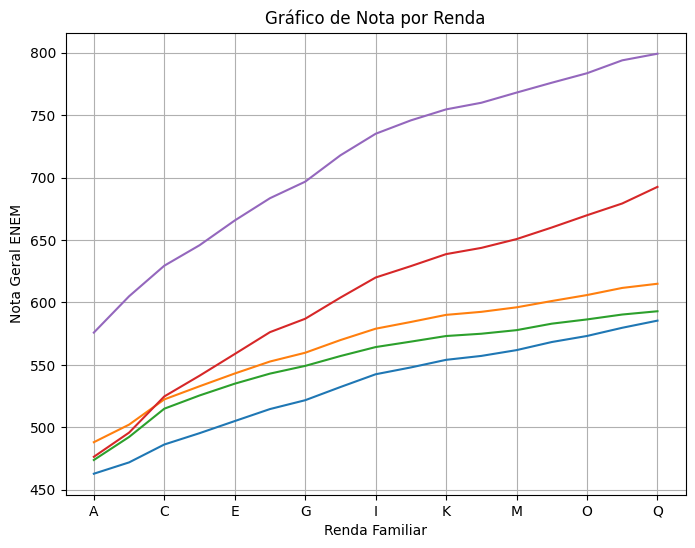

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df_filtrado = df[filtro_presenca]

plt.figure(figsize=(8, 6))

df_filtrado['NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
df_filtrado['NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
df_filtrado['NU_NOTA_CN'] = df_filtrado['NU_NOTA_CN'].astype(float)
df_filtrado['NU_NOTA_LC'] = df_filtrado['NU_NOTA_LC'].astype(float)
df_filtrado['NU_NOTA_MT'] = df_filtrado['NU_NOTA_MT'].astype(float)

media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

media_notas_por_renda['NU_NOTA_CN'].plot(label='Ciências da Natureza')
media_notas_por_renda['NU_NOTA_CH'].plot(label='Ciências Humanas')
media_notas_por_renda['NU_NOTA_LC'].plot(label='Linguagens e Códigos')
media_notas_por_renda['NU_NOTA_MT'].plot(label='Matemática')
media_notas_por_renda['NU_NOTA_REDACAO'].plot(label='Redação')

plt.title('Gráfico de Nota por Renda')
plt.xlabel('Renda Familiar')
plt.ylabel('Nota Geral ENEM')
plt.grid(True)
plt.show()